In [1]:
import requests
import json
from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
url = 'https://www.fotmob.com/es/matches/spain-vs-england/1wvxa5#4043985'

r = requests.get(url)

In [3]:
r.status_code

200

<!DOCTYPE html>
<html lang="es">
 <head>
  <meta content="app-id=488575683" name="apple-itunes-app"/>
  <link href="android-app://com.mobilefootie.wc2010/http" rel="alternate"/>
  <link href="/img/android-icon-192x192.png" rel="apple-touch-icon"/>
  <meta content="all" name="robots"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/>
  <meta content="FotMob" property="og:site_name"/>
  <meta content="204905456199565" property="fb:app_id"/>
  <meta content="christer.nordvik" property="fb:admins"/>
  <meta content="https://www.facebook.com/fotmob" property="article:author"/>
  <meta content="https://www.facebook.com/fotmob" property="article:publisher"/>
  <meta content="iAsqa4atH8Kb02MqS9Sc0oZC__7WrvJYU6zYqJqE6Ww" name="google-site-verification"/>
  <link href="https://www.fotmob.com/topnews/feed" rel="alternate" title="Principales noticias" type="application/atom+xml"/>
  <link href="https://www.fotmob.com/matches/spa
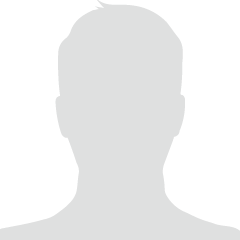
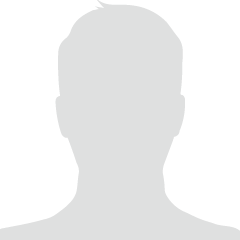
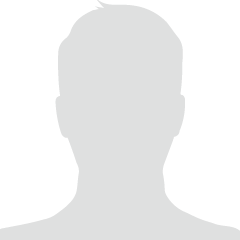
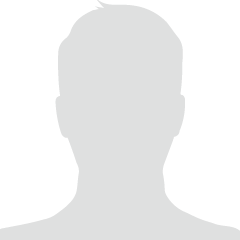
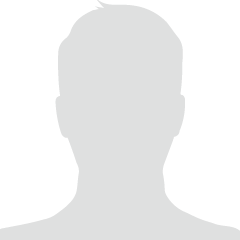
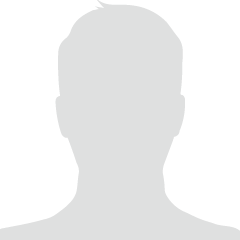
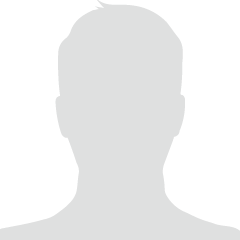
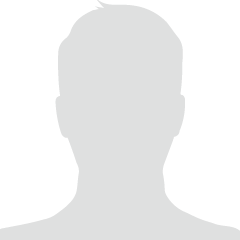
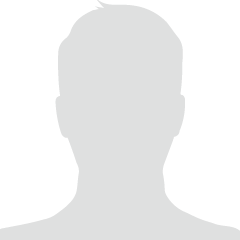
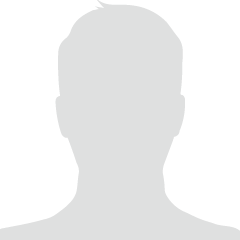
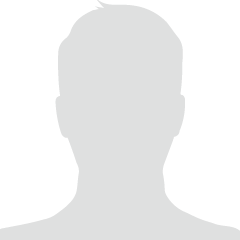
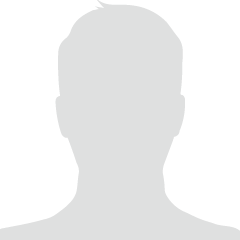
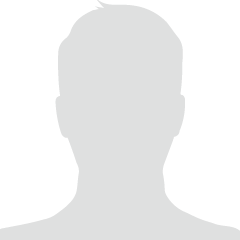
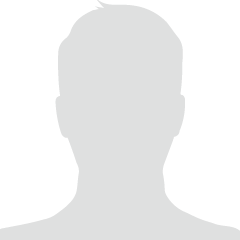
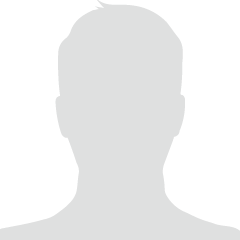
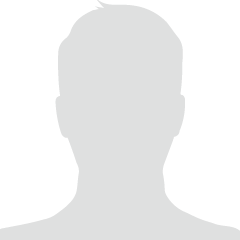
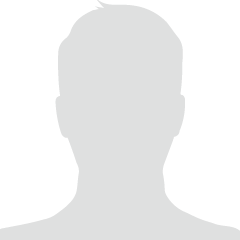
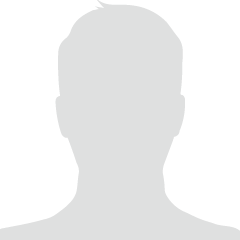
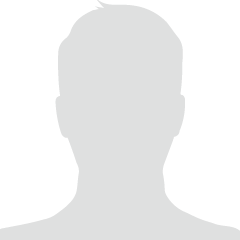
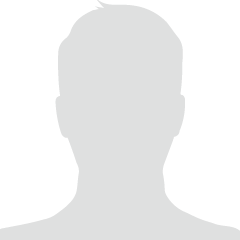
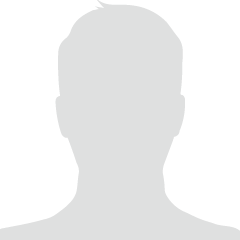
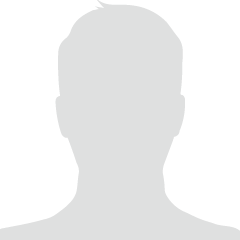
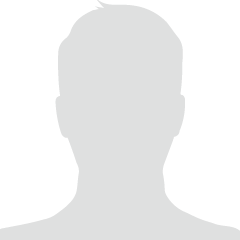
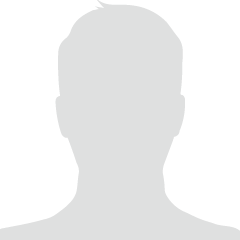
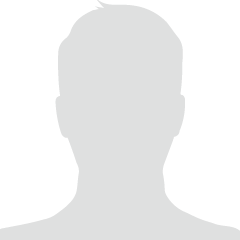
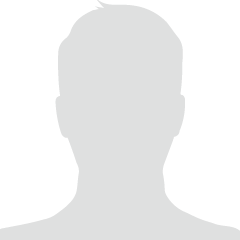
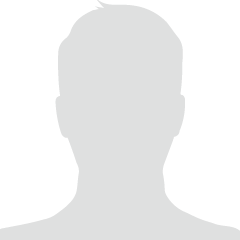
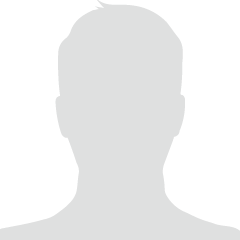
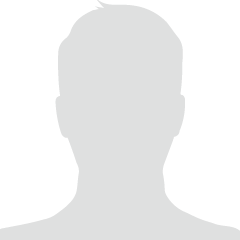
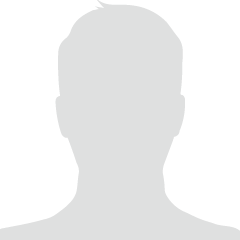
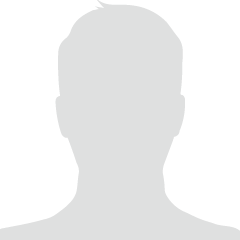
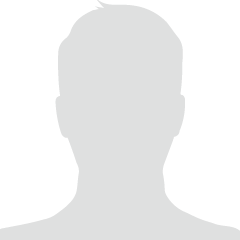
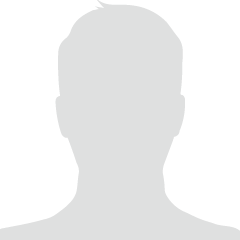
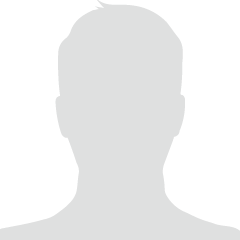
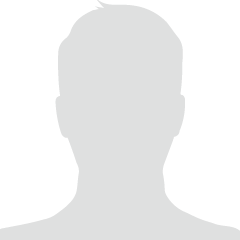
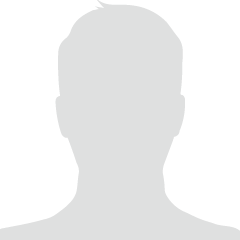
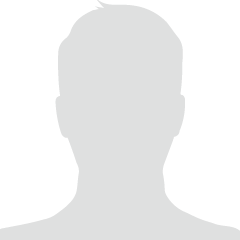
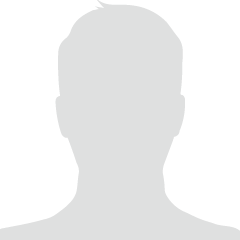
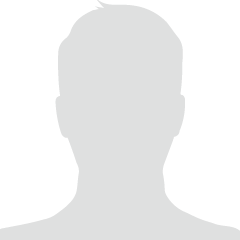
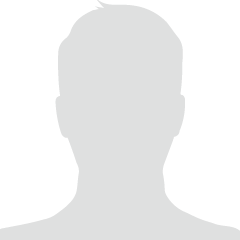
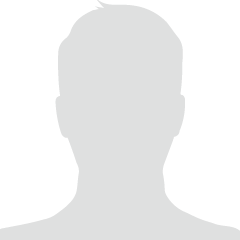
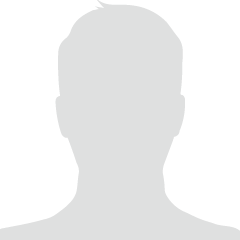
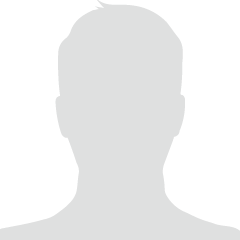
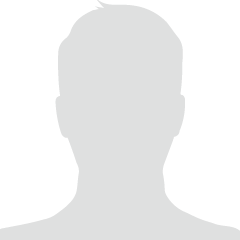
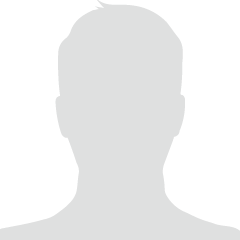
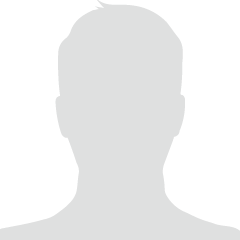
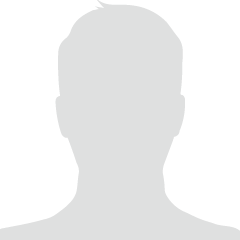
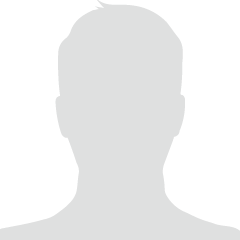
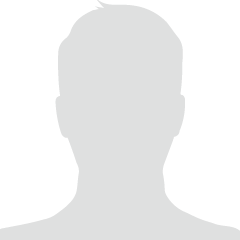
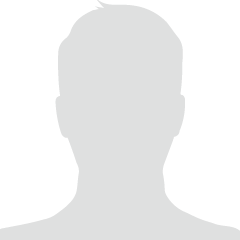
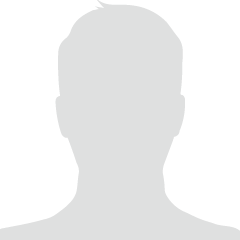
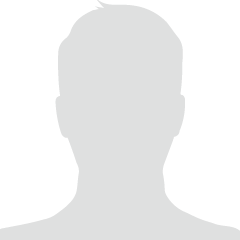
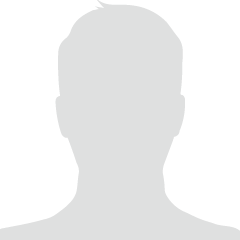
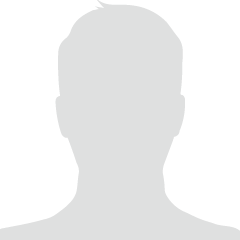
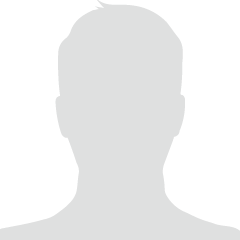
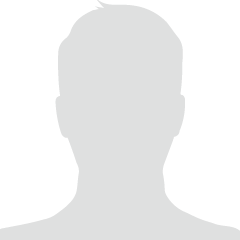
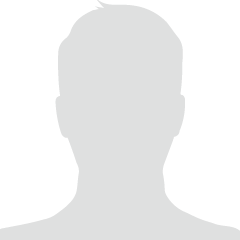
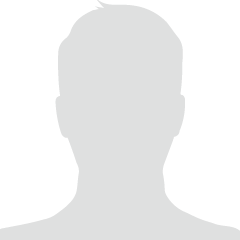
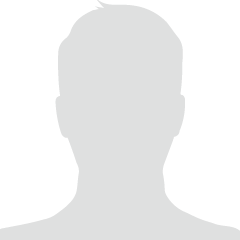
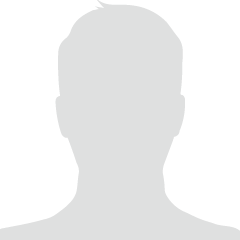
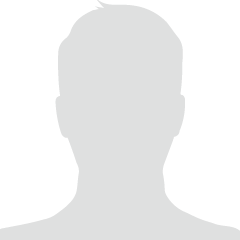
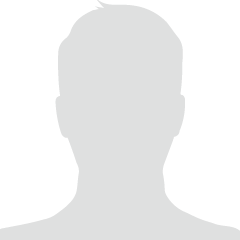
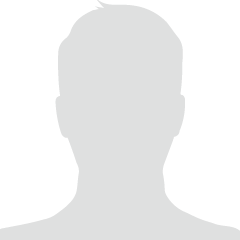
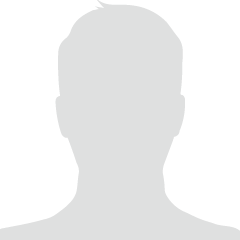
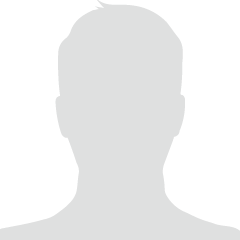
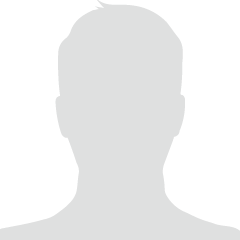
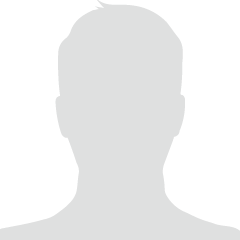
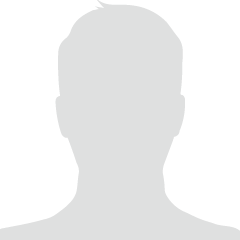
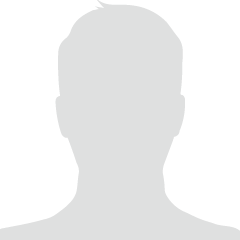
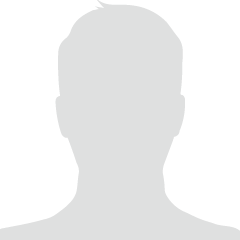
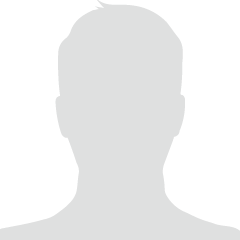
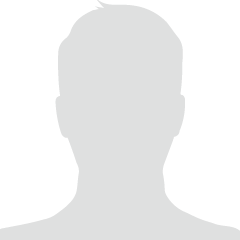
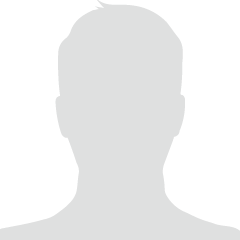
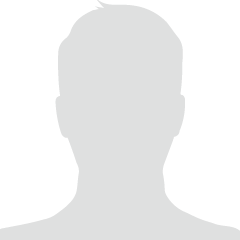
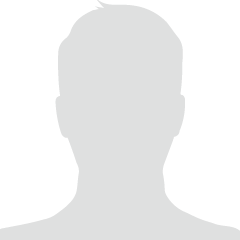
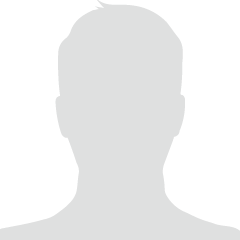
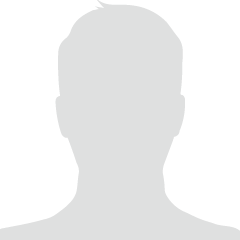
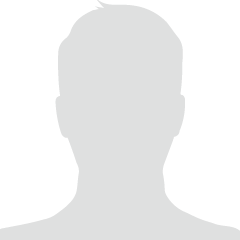
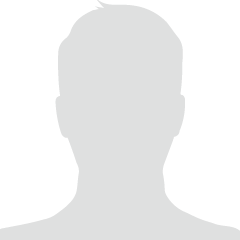
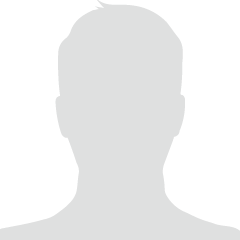
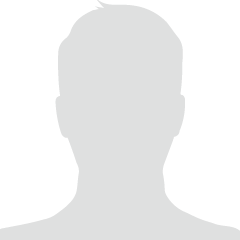
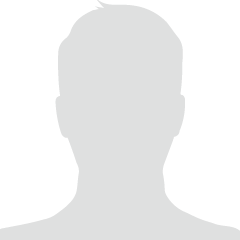
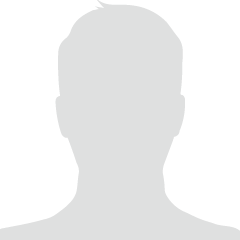
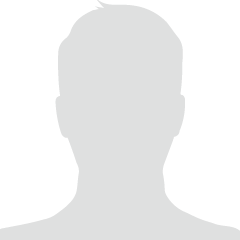
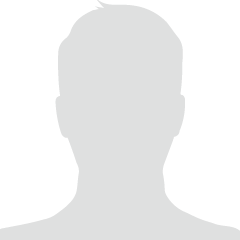

In [3]:
soup = bs(r.content)

print(soup.prettify())

In [4]:
# Get id NEXT DATA

soup.find('script', attrs={'id': '__NEXT_DATA__'})

<script id="__NEXT_DATA__" type="application/json">{"props":{"pageProps":{"general":{"matchId":"4043985","matchName":"Spain-vs-England_Sun, Jul 14, 2024, 19:00 UTC","matchRound":"final","teamColors":{"darkMode":{"home":"#c62035","away":"#FFFFFF"},"lightMode":{"home":"#c62035","away":"#6FA3E6"},"fontDarkMode":{"home":"rgba(255, 255, 255, 1.0)","away":"rgba(29, 29, 29, 1.0)"},"fontLightMode":{"home":"rgba(255, 255, 255, 1.0)","away":"rgba(255, 255, 255, 1.0)"}},"leagueId":881533,"leagueName":"EURO Final Stage","leagueRoundName":"Final","parentLeagueId":50,"countryCode":"INT","homeTeam":{"name":"Spain","id":6720},"awayTeam":{"name":"England","id":8491},"coverageLevel":"xG","matchTimeUTC":"Sun, Jul 14, 2024, 19:00 UTC","matchTimeUTCDate":"2024-07-14T19:00:00.000Z","started":true,"finished":true},"header":{"teams":[{"name":"Spain","id":6720,"score":2,"imageUrl":"https://images.fotmob.com/image_resources/logo/teamlogo/6720_small.png","pageUrl":"/teams/6720/overview/spain"},{"name":"England",

In [12]:
# Get content of that attribute | returns a LIST

soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents

['{"props":{"pageProps":{"general":{"matchId":"4043985","matchName":"Spain-vs-England_Sun, Jul 14, 2024, 19:00 UTC","matchRound":"final","teamColors":{"darkMode":{"home":"#c62035","away":"#FFFFFF"},"lightMode":{"home":"#c62035","away":"#6FA3E6"},"fontDarkMode":{"home":"rgba(255, 255, 255, 1.0)","away":"rgba(29, 29, 29, 1.0)"},"fontLightMode":{"home":"rgba(255, 255, 255, 1.0)","away":"rgba(255, 255, 255, 1.0)"}},"leagueId":881533,"leagueName":"EURO Final Stage","leagueRoundName":"Final","parentLeagueId":50,"countryCode":"INT","homeTeam":{"name":"Spain","id":6720},"awayTeam":{"name":"England","id":8491},"coverageLevel":"xG","matchTimeUTC":"Sun, Jul 14, 2024, 19:00 UTC","matchTimeUTCDate":"2024-07-14T19:00:00.000Z","started":true,"finished":true},"header":{"teams":[{"name":"Spain","id":6720,"score":2,"imageUrl":"https://images.fotmob.com/image_resources/logo/teamlogo/6720_small.png","pageUrl":"/teams/6720/overview/spain"},{"name":"England","id":8491,"score":1,"imageUrl":"https://images.fo

In [6]:
# This is a 'bs4.element.Script'(json file) not a dictionary

soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0]

'{"props":{"pageProps":{"general":{"matchId":"4043985","matchName":"Spain-vs-England_Sun, Jul 14, 2024, 19:00 UTC","matchRound":"final","teamColors":{"darkMode":{"home":"#c62035","away":"#FFFFFF"},"lightMode":{"home":"#c62035","away":"#6FA3E6"},"fontDarkMode":{"home":"rgba(255, 255, 255, 1.0)","away":"rgba(29, 29, 29, 1.0)"},"fontLightMode":{"home":"rgba(255, 255, 255, 1.0)","away":"rgba(255, 255, 255, 1.0)"}},"leagueId":881533,"leagueName":"EURO Final Stage","leagueRoundName":"Final","parentLeagueId":50,"countryCode":"INT","homeTeam":{"name":"Spain","id":6720},"awayTeam":{"name":"England","id":8491},"coverageLevel":"xG","matchTimeUTC":"Sun, Jul 14, 2024, 19:00 UTC","matchTimeUTCDate":"2024-07-14T19:00:00.000Z","started":true,"finished":true},"header":{"teams":[{"name":"Spain","id":6720,"score":2,"imageUrl":"https://images.fotmob.com/image_resources/logo/teamlogo/6720_small.png","pageUrl":"/teams/6720/overview/spain"},{"name":"England","id":8491,"score":1,"imageUrl":"https://images.fot

In [7]:
# The json.loads() method can be used to parse a valid JSON string and convert it into a Python Dictionary

json.loads(soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0])

{'props': {'pageProps': {'general': {'matchId': '4043985',
    'matchName': 'Spain-vs-England_Sun, Jul 14, 2024, 19:00 UTC',
    'matchRound': 'final',
    'teamColors': {'darkMode': {'home': '#c62035', 'away': '#FFFFFF'},
     'lightMode': {'home': '#c62035', 'away': '#6FA3E6'},
     'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)',
      'away': 'rgba(29, 29, 29, 1.0)'},
     'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
      'away': 'rgba(255, 255, 255, 1.0)'}},
    'leagueId': 881533,
    'leagueName': 'EURO Final Stage',
    'leagueRoundName': 'Final',
    'parentLeagueId': 50,
    'countryCode': 'INT',
    'homeTeam': {'name': 'Spain', 'id': 6720},
    'awayTeam': {'name': 'England', 'id': 8491},
    'coverageLevel': 'xG',
    'matchTimeUTC': 'Sun, Jul 14, 2024, 19:00 UTC',
    'matchTimeUTCDate': '2024-07-14T19:00:00.000Z',
    'started': True,
    'finished': True},
   'header': {'teams': [{'name': 'Spain',
      'id': 6720,
      'score': 2,
      'imageUrl': 'http

In [8]:
# Load what we need in json_fotmob variable

json_fotmob = json.loads(soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0])

In [9]:
# Get keys | PROPS the only one with interesting data

json_fotmob.keys()

dict_keys(['props', 'page', 'query', 'buildId', 'isFallback', 'isExperimentalCompile', 'dynamicIds', 'gssp', 'appGip', 'locale', 'locales', 'defaultLocale', 'scriptLoader'])

In [10]:
json_fotmob['page']

'/matches/[seo]/[h2h]'

In [17]:
# Get the ID to get the URL? https://www.fotmob.com/es/matches/spain-vs-england/1wvxa5#4043985

json_fotmob['query']

{'seo': 'spain-vs-england', 'h2h': '1wvxa5'}

In [13]:
json_fotmob['buildId']

'eAHLLRwdOllnSYiyeJlF2'

In [25]:
# PROPS

json_fotmob['props'].keys()

dict_keys(['pageProps', 'url', 'toggles', 'context', '__N_SSP'])

In [28]:
json_fotmob['props']['pageProps'].keys()

dict_keys(['general', 'header', 'nav', 'ongoing', 'hasPendingVAR', 'content', 'seo', 'ssr', 'fallback', '_nextI18Next'])

In [32]:
# matchId, teamColors, homeTeam, awayTeam

json_fotmob['props']['pageProps']['general']

{'matchId': '4043985',
 'matchName': 'Spain-vs-England_Sun, Jul 14, 2024, 19:00 UTC',
 'matchRound': 'final',
 'teamColors': {'darkMode': {'home': '#c62035', 'away': '#FFFFFF'},
  'lightMode': {'home': '#c62035', 'away': '#6FA3E6'},
  'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)',
   'away': 'rgba(29, 29, 29, 1.0)'},
  'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
   'away': 'rgba(255, 255, 255, 1.0)'}},
 'leagueId': 881533,
 'leagueName': 'EURO Final Stage',
 'leagueRoundName': 'Final',
 'parentLeagueId': 50,
 'countryCode': 'INT',
 'homeTeam': {'name': 'Spain', 'id': 6720},
 'awayTeam': {'name': 'England', 'id': 8491},
 'coverageLevel': 'xG',
 'matchTimeUTC': 'Sun, Jul 14, 2024, 19:00 UTC',
 'matchTimeUTCDate': '2024-07-14T19:00:00.000Z',
 'started': True,
 'finished': True}

In [49]:
# Events -> home & away goals

json_fotmob['props']['pageProps']['header']

{'teams': [{'name': 'Spain',
   'id': 6720,
   'score': 2,
   'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/6720_small.png',
   'pageUrl': '/teams/6720/overview/spain'},
  {'name': 'England',
   'id': 8491,
   'score': 1,
   'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/8491_small.png',
   'pageUrl': '/teams/8491/overview/england'}],
 'status': {'utcTime': '2024-07-14T19:00:00.000Z',
  'timezone': 'UTC',
  'homeRedCards': [],
  'awayRedCards': [],
  'halfs': {'firstHalfStarted': '14.07.2024 21:00:21',
   'firstHalfEnded': '14.07.2024 21:47:25',
   'secondHalfStarted': '14.07.2024 22:04:15',
   'secondHalfEnded': '14.07.2024 22:53:28',
   'firstExtraHalfStarted': '',
   'secondExtraHalfStarted': '',
   'gameEnded': '14.07.2024 22:53:28'},
  'finished': True,
  'started': True,
  'cancelled': False,
  'awarded': False,
  'scoreStr': '2 - 1',
  'reason': {'short': 'FT',
   'shortKey': 'fulltime_short',
   'long': 'Full-Time',
   'longKey': 'fi

In [76]:
json_fotmob['props']['pageProps']['content'].keys()

dict_keys(['matchFacts', 'liveticker', 'superlive', 'buzz', 'stats', 'playerStats', 'shotmap', 'lineup2', 'match2Lineup', 'playoff', 'table', 'h2h', 'momentum'])

In [67]:
json_fotmob['props']['pageProps']['content']['matchFacts'].keys()

dict_keys(['matchId', 'highlights', 'playerOfTheMatch', 'events', 'infoBox', 'teamForm', 'poll', 'topPlayers', 'insights', 'topScorers', 'momentum', 'countryCode', 'postReview', 'preReview', 'QAData'])

In [18]:
# Match ID for the url

json_fotmob['props']['pageProps']['content']['matchFacts']['matchId']

4043985

In [22]:
# PlayerOfTheMatch -> shotmap, stats(attack, defense, duels)

json_fotmob['props']['pageProps']['content']['matchFacts']['playerOfTheMatch']

{'id': 1202110,
 'name': {'firstName': 'Nico',
  'lastName': 'Williams',
  'fullName': 'Nico Williams'},
 'teamName': 'Spain',
 'teamId': 6720,
 'rating': {'num': '8.2',
  'isTop': {'isTopRating': True, 'isMatchFinished': True}},
 'minutesPlayed': 90,
 'shotmap': [{'id': 2701070459,
   'eventType': 'AttemptSaved',
   'teamId': 6720,
   'playerId': 1202110,
   'playerName': 'Nico Williams',
   'x': 101.77586206919999,
   'y': 46.8033120985,
   'min': 12,
   'minAdded': None,
   'isBlocked': True,
   'isOnTarget': True,
   'blockedX': 102.4396551726,
   'blockedY': 44.6313375752,
   'goalCrossedY': 37.12625,
   'goalCrossedZ': 1.2199999940000001,
   'expectedGoals': 0.025316959246993065,
   'expectedGoalsOnTarget': None,
   'shotType': 'LeftFoot',
   'situation': 'RegularPlay',
   'period': 'FirstHalf',
   'isOwnGoal': False,
   'onGoalShot': {'x': 0.1729497354497358,
    'y': 0.32275132116402117,
    'zoomRatio': 1},
   'isSavedOffLine': False,
   'isFromInsideBox': True,
   'teamColor'

In [23]:
# events -> addedTime, half, substitution, GOAL(details), assist

json_fotmob['props']['pageProps']['content']['matchFacts']['events']

{'ongoing': False,
 'events': [{'reactKey': '1160472225Card194165undefinedfalse',
   'timeStr': 25,
   'type': 'Card',
   'time': 25,
   'overloadTime': None,
   'eventId': 11604722,
   'player': {'id': 194165,
    'name': 'Harry Kane',
    'profileUrl': '/players/194165/harry-kane'},
   'profileUrl': '/players/194165/harry-kane',
   'overloadTimeStr': False,
   'isHome': False,
   'nameStr': 'Harry Kane',
   'card': 'Yellow',
   'cardDescription': None},
  {'reactKey': '1160473731Card614834undefinedtrue',
   'timeStr': 31,
   'type': 'Card',
   'time': 31,
   'overloadTime': None,
   'eventId': 11604737,
   'player': {'id': 614834,
    'name': 'Dani Olmo',
    'profileUrl': '/players/614834/dani-olmo'},
   'profileUrl': '/players/614834/dani-olmo',
   'overloadTimeStr': False,
   'isHome': True,
   'nameStr': 'Dani Olmo',
   'card': 'Yellow',
   'cardDescription': None},
  {'reactKey': 'undefined45AddedTimeNaNundefinedundefined',
   'timeStr': 45,
   'type': 'AddedTime',
   'time': 45

In [27]:
# stadium info

json_fotmob['props']['pageProps']['content']['matchFacts']['infoBox']

{'Match Date': {'utcTime': '2024-07-14T19:00:00.000Z',
  'timezone': 'UTC',
  'isDateCorrect': True},
 'Tournament': {'id': 881533,
  'parentLeagueId': 50,
  'link': '/leagues/50/overview/euro-final-stage',
  'leagueName': 'EURO Final Stage',
  'roundName': 'Final',
  'round': 'final'},
 'Stadium': {'name': 'Olympiastadion Berlin',
  'city': 'Berlin',
  'country': '',
  'lat': 52.514628,
  'long': 13.239545},
 'Referee': {'imgUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/fra.png',
  'text': 'François Letexier',
  'country': 'France'},
 'Attendance': 65600}

In [34]:
# home & away top player

json_fotmob['props']['pageProps']['content']['matchFacts']['topPlayers']

{'homeTopPlayers': [{'playerId': 1202110,
   'name': {'firstName': 'Nico',
    'lastName': 'Williams',
    'fullName': 'Nico Williams'},
   'playerRatingRounded': '8.2',
   'playerRating': 8.17,
   'color': '#33C771',
   'manOfTheMatch': True,
   'teamId': '6720',
   'positionLabel': {'label': 'LW', 'key': 'leftwinger_short'}},
  {'playerId': 873289,
   'name': {'firstName': 'Marc',
    'lastName': 'Cucurella',
    'fullName': 'Marc Cucurella'},
   'playerRatingRounded': '7.7',
   'playerRating': 7.68,
   'color': '#33C771',
   'manOfTheMatch': False,
   'teamId': '6720',
   'positionLabel': {'label': 'LB', 'key': 'leftback_short'}},
  {'playerId': 1467236,
   'name': {'firstName': 'Lamine',
    'lastName': 'Yamal',
    'fullName': 'Lamine Yamal'},
   'playerRatingRounded': '7.6',
   'playerRating': 7.64,
   'color': '#33C771',
   'manOfTheMatch': False,
   'teamId': '6720',
   'positionLabel': {'label': 'RW', 'key': 'rightwinger_short'}},
  {'playerId': 678234,
   'name': {'firstName'

In [109]:
# matchMomentum

json_fotmob['props']['pageProps']['content']['matchFacts']['momentum']

{'main': {'data': [{'minute': 1, 'value': 5},
   {'minute': 2, 'value': 14},
   {'minute': 3, 'value': 14},
   {'minute': 4, 'value': 19},
   {'minute': 5, 'value': 22},
   {'minute': 6, 'value': 43},
   {'minute': 7, 'value': 38},
   {'minute': 8, 'value': 38},
   {'minute': 9, 'value': 22},
   {'minute': 10, 'value': 16},
   {'minute': 11, 'value': 5},
   {'minute': 12, 'value': 0},
   {'minute': 13, 'value': 100},
   {'minute': 14, 'value': 100},
   {'minute': 15, 'value': 98},
   {'minute': 16, 'value': -22},
   {'minute': 17, 'value': -62},
   {'minute': 18, 'value': -30},
   {'minute': 19, 'value': -14},
   {'minute': 20, 'value': 33},
   {'minute': 21, 'value': 54},
   {'minute': 22, 'value': 43},
   {'minute': 23, 'value': 35},
   {'minute': 24, 'value': 8},
   {'minute': 25, 'value': -35},
   {'minute': 26, 'value': -43},
   {'minute': 27, 'value': -33},
   {'minute': 28, 'value': 54},
   {'minute': 29, 'value': 54},
   {'minute': 30, 'value': 49},
   {'minute': 31, 'value': 5

In [55]:
# TopStats -> ball possesion, xG, total shots, shots on target, big chances, big chances missed... Shots, xG, passes, defence, duels... FirstHalf, SecondHalf

json_fotmob['props']['pageProps']['content']['stats']

{'Periods': {'All': {'stats': [{'title': 'Top stats',
     'key': 'top_stats',
     'stats': [{'title': 'Ball possession',
       'key': 'BallPossesion',
       'stats': [65, 35],
       'type': 'graph',
       'highlighted': 'home'},
      {'title': 'Expected goals (xG)',
       'key': 'expected_goals',
       'stats': ['1.95', '0.53'],
       'type': 'text',
       'highlighted': 'home'},
      {'title': 'Total shots',
       'key': 'total_shots',
       'stats': [16, 9],
       'type': 'text',
       'highlighted': 'home'},
      {'title': 'Shots on target',
       'key': 'ShotsOnTarget',
       'stats': [6, 4],
       'type': 'text',
       'highlighted': 'home'},
      {'title': 'Big chances',
       'key': 'big_chance',
       'stats': [5, 2],
       'type': 'text',
       'highlighted': 'home'},
      {'title': 'Big chances missed',
       'key': 'big_chance_missed_title',
       'stats': [3, 2],
       'type': 'text',
       'highlighted': 'away'},
      {'title': 'Accurate pas

In [62]:
# stats players -> top stats, attack, defense, duels. shotmap

json_fotmob['props']['pageProps']['content']['playerStats']

{'33991': {'name': 'Jesus Navas', 'stats': [], 'shotmap': []},
 '159833': {'name': 'Kyle Walker',
  'stats': [{'title': 'Top stats',
    'key': 'top_stats',
    'stats': {'FotMob rating': {'key': 'rating_title',
      'stat': {'value': 6.45, 'type': 'double'}},
     'Minutes played': {'key': 'minutes_played',
      'stat': {'value': 90, 'type': 'integer'}},
     'Goals': {'key': 'goals', 'stat': {'value': 0, 'type': 'integer'}},
     'Assists': {'key': 'assists', 'stat': {'value': 0, 'type': 'integer'}},
     'Total shots': {'key': 'total_shots',
      'stat': {'value': 0, 'type': 'integer'}},
     'Shotmap': {'key': None, 'stat': {'value': None}},
     'Accurate passes': {'key': 'accurate_passes',
      'stat': {'value': 30, 'total': 35, 'type': 'fractionWithPercentage'}},
     'Chances created': {'key': 'chances_created',
      'stat': {'value': 0, 'type': 'integer'}},
     'Expected assists (xA)': {'key': 'expected_assists',
      'stat': {'value': 0.01, 'type': 'double'}},
     'xG

In [66]:
json_fotmob['props']['pageProps']['content']['shotmap'].keys()

dict_keys(['shots', 'Periods'])

In [70]:
# Shots

json_fotmob['props']['pageProps']['content']['shotmap']['shots']

[{'id': 2701070459,
  'eventType': 'AttemptSaved',
  'teamId': 6720,
  'playerId': 1202110,
  'playerName': 'Nico Williams',
  'x': 101.77586206919999,
  'y': 46.8033120985,
  'min': 12,
  'minAdded': None,
  'isBlocked': True,
  'isOnTarget': True,
  'blockedX': 102.4396551726,
  'blockedY': 44.6313375752,
  'goalCrossedY': 37.12625,
  'goalCrossedZ': 1.2199999940000001,
  'expectedGoals': 0.025316959246993065,
  'expectedGoalsOnTarget': None,
  'shotType': 'LeftFoot',
  'situation': 'RegularPlay',
  'period': 'FirstHalf',
  'isOwnGoal': False,
  'onGoalShot': {'x': 0.1729497354497358,
   'y': 0.32275132116402117,
   'zoomRatio': 1},
  'isSavedOffLine': False,
  'isFromInsideBox': True,
  'firstName': 'Nico',
  'lastName': 'Williams',
  'fullName': 'Nico Williams',
  'teamColor': '#c62035'},
 {'id': 2701070669,
  'eventType': 'Miss',
  'teamId': 6720,
  'playerId': 609516,
  'playerName': 'Robin Le Normand',
  'x': 98.3421052628,
  'y': 35.83,
  'min': 13,
  'minAdded': None,
  'isBlo

In [75]:
# Shots by periods
json_fotmob['props']['pageProps']['content']['shotmap']['Periods'].keys()

dict_keys(['All', 'FirstHalf', 'SecondHalf'])

In [80]:
json_fotmob['props']['pageProps']['content']['lineup2'].keys()

dict_keys(['matchId', 'lineupType', 'availableFilters', 'homeTeam', 'awayTeam'])

In [86]:
json_fotmob['props']['pageProps']['content']['lineup2']['homeTeam'].keys()

dict_keys(['id', 'name', 'rating', 'formation', 'starters', 'coach', 'subs', 'unavailable'])

In [87]:
# HomeTeamLineup -> starters info, coach info, subs info

json_fotmob['props']['pageProps']['content']['lineup2']['homeTeam']

{'id': 6720,
 'name': 'Spain',
 'rating': 7.18,
 'formation': '4-2-3-1',
 'starters': [{'id': 660625,
   'optaId': '212769',
   'name': 'Unai Simon',
   'positionId': 11,
   'usualPlayingPositionId': 0,
   'shirtNumber': '23',
   'isCaptain': False,
   'horizontalLayout': {'x': 0.1, 'y': 0.5, 'height': 0.25, 'width': 0.192},
   'verticalLayout': {'x': 0.5, 'y': 0.1, 'height': 0.192, 'width': 1},
   'performance': {'rating': 6.31,
    'events': [],
    'substitutionEvents': [],
    'playerOfTheMatch': False},
   'firstName': 'Unai',
   'lastName': 'Simon'},
  {'id': 282674,
   'optaId': '88483',
   'name': 'Daniel Carvajal',
   'positionId': 32,
   'usualPlayingPositionId': 1,
   'shirtNumber': '2',
   'isCaptain': False,
   'horizontalLayout': {'x': 0.293,
    'y': 0.875,
    'height': 0.25,
    'width': 0.385},
   'verticalLayout': {'x': 0.125, 'y': 0.293, 'height': 0.192, 'width': 0.25},
   'performance': {'rating': 6.82,
    'events': [],
    'substitutionEvents': [],
    'playerOfT

In [88]:
# AwayTeamLineup -> starters info, coach info, subs info

json_fotmob['props']['pageProps']['content']['lineup2']['awayTeam']

{'id': 8491,
 'name': 'England',
 'rating': 6.57,
 'formation': '4-2-3-1',
 'starters': [{'id': 303919,
   'optaId': '111234',
   'name': 'Jordan Pickford',
   'positionId': 11,
   'usualPlayingPositionId': 0,
   'shirtNumber': '1',
   'isCaptain': False,
   'horizontalLayout': {'x': 0.1, 'y': 0.5, 'height': 0.25, 'width': 0.192},
   'verticalLayout': {'x': 0.5, 'y': 0.1, 'height': 0.192, 'width': 1},
   'performance': {'rating': 7.16,
    'events': [],
    'substitutionEvents': [],
    'playerOfTheMatch': False},
   'firstName': 'Jordan',
   'lastName': 'Pickford'},
  {'id': 159833,
   'optaId': '58621',
   'name': 'Kyle Walker',
   'positionId': 32,
   'usualPlayingPositionId': 1,
   'shirtNumber': '2',
   'isCaptain': False,
   'horizontalLayout': {'x': 0.293,
    'y': 0.875,
    'height': 0.25,
    'width': 0.193},
   'verticalLayout': {'x': 0.125, 'y': 0.293, 'height': 0.192, 'width': 0.25},
   'performance': {'rating': 6.45,
    'events': [],
    'substitutionEvents': [],
    'pl

In [90]:
json_fotmob['props']['pageProps']['content']['match2Lineup'].keys()

dict_keys(['matchId', 'lineupType', 'availableFilters', 'homeTeam', 'awayTeam'])

In [98]:
# More detail lineup HomeTeam & AwayTeam

json_fotmob['props']['pageProps']['content']['match2Lineup']['homeTeam']

dict_keys(['id', 'name', 'rating', 'formation', 'starters', 'coach', 'subs', 'unavailable', 'averageStarterAge'])

In [110]:
# Match momentum v2

json_fotmob['props']['pageProps']['content']['momentum']

{'main': {'data': [{'minute': 0, 'value': 0},
   {'minute': 1, 'value': 5},
   {'minute': 2, 'value': 14},
   {'minute': 3, 'value': 14},
   {'minute': 4, 'value': 19},
   {'minute': 5, 'value': 22},
   {'minute': 6, 'value': 43},
   {'minute': 7, 'value': 38},
   {'minute': 8, 'value': 38},
   {'minute': 9, 'value': 22},
   {'minute': 10, 'value': 16},
   {'minute': 11, 'value': 5},
   {'minute': 12, 'value': 0},
   {'minute': 13, 'value': 100},
   {'minute': 14, 'value': 100},
   {'minute': 15, 'value': 98},
   {'minute': 16, 'value': -22},
   {'minute': 17, 'value': -62},
   {'minute': 18, 'value': -30},
   {'minute': 19, 'value': -14},
   {'minute': 20, 'value': 33},
   {'minute': 21, 'value': 54},
   {'minute': 22, 'value': 43},
   {'minute': 23, 'value': 35},
   {'minute': 24, 'value': 8},
   {'minute': 25, 'value': -35},
   {'minute': 26, 'value': -43},
   {'minute': 27, 'value': -33},
   {'minute': 28, 'value': 54},
   {'minute': 29, 'value': 54},
   {'minute': 30, 'value': 49}